In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import re

In [27]:
# Configuration
sns.set()
plt.rcParams.update({
    'figure.figsize': (3*3, 2*3),
    'figure.dpi': 200,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman'],
    'text.usetex': True,
    'text.latex.unicode': True,
    'text.latex.preamble': [
        r'\usepackage{siunitx}',
        r'\usepackage{physics}'
    ]
})
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

In [4]:
def training_data(f):
    training = []
    validation = []
    best = 0
    with open(f) as f:
        for line in f:
            match = re.search(r'Epoch (\d+) .* Training .* Steps: (\d+) .* Loss: (\d+\.\d+)', line)
            if match:
                training.append([eval(x) for x in match.groups()])
            else:
                match = re.search(r'Epoch (\d+) .* Validation .* Steps: (\d+) .* Loss: (\d+\.\d+)', line)
                if match:
                    validation.append([eval(x) for x in match.groups()])
                else:
                    match = re.search(r'new best validating model', line)
                    if match:
                        best = training[-1][0]
    return (pd.DataFrame(columns=['epoch', 'step', 'loss'], data=training), 
            pd.DataFrame(columns=['epoch', 'step', 'loss'], data=validation), best)

t_plain, v_plain, b_plain = training_data('logs/training-testing-plain.log')
t_transfer, v_transfer, b_transfer = training_data('logs/training-simple-transfer.log')
t_1layer, v_1layer, b_1layer = training_data('logs/training-1l.log')
t_2layer, v_2layer, b_2layer = training_data('logs/training-2l.log')
t_3layer, v_3layer, b_3layer = training_data('logs/training-3l.log')
t_4layer, v_4layer, b_4layer = training_data('logs/training-4l.log')

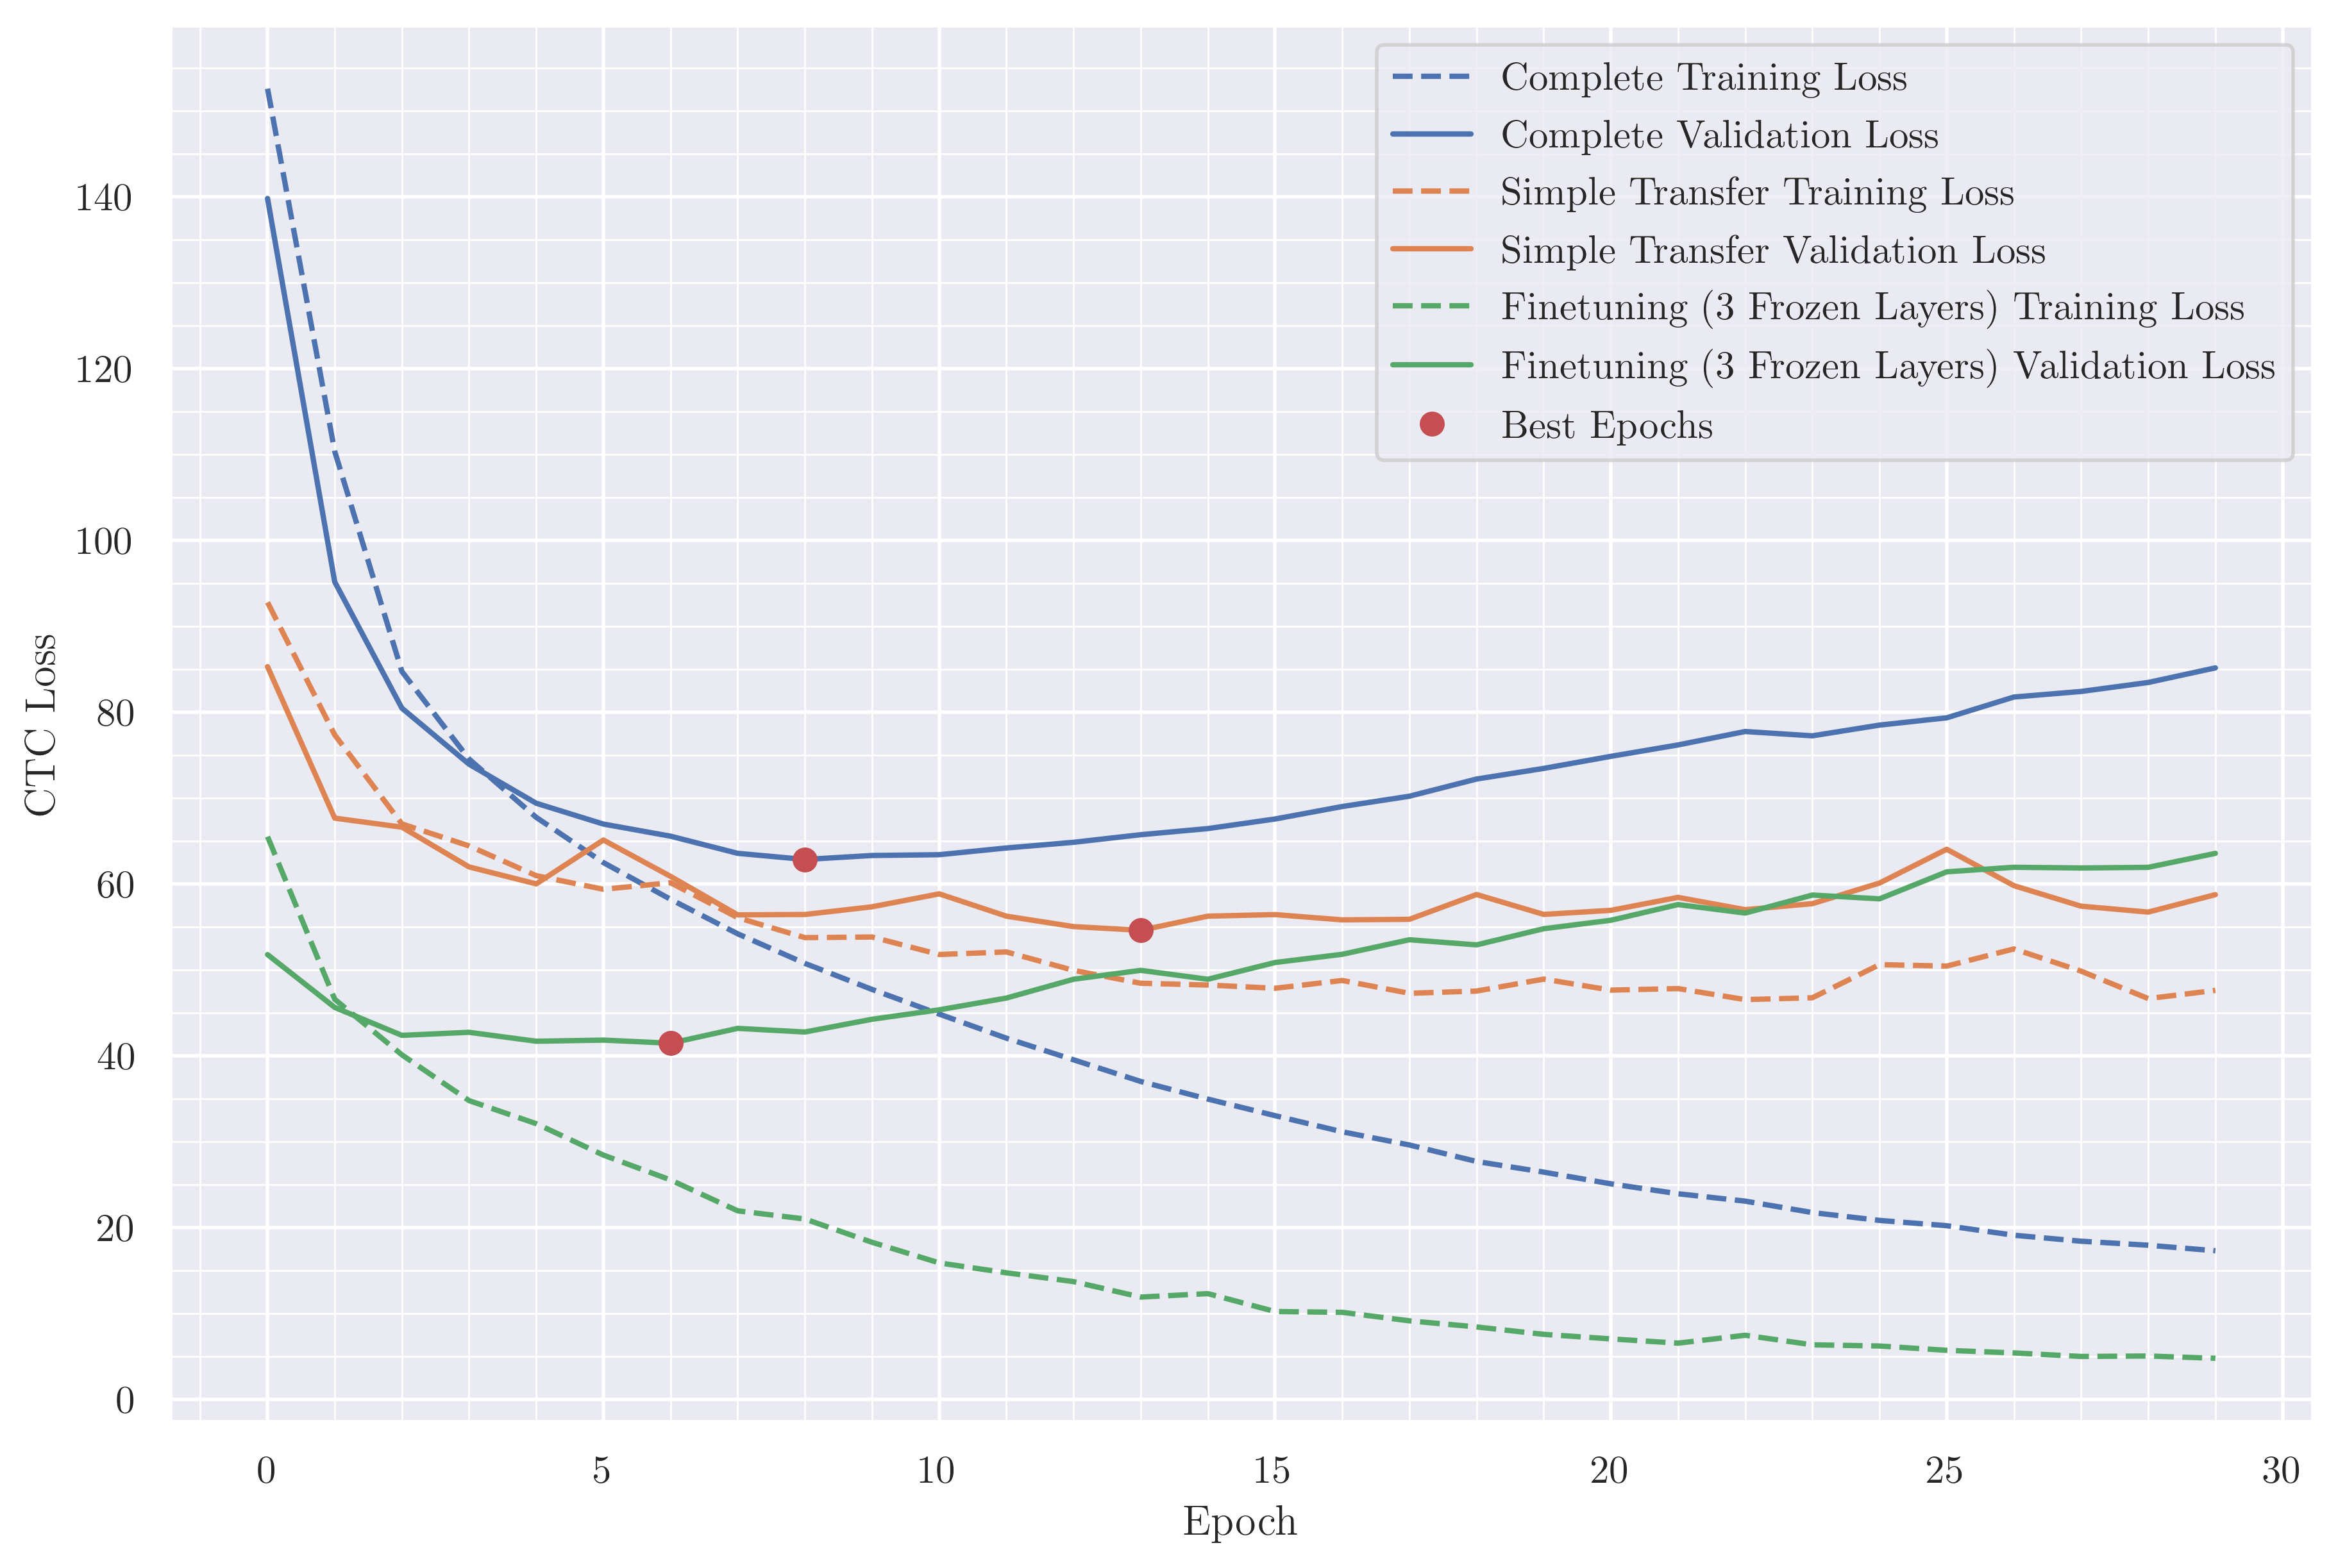

In [34]:
fig, ax = plt.subplots(constrained_layout=True)
ax.set_ylabel('CTC Loss')
ax.set_xlabel('Epoch')
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(True, 'minor', linewidth=0.5)

ax.plot(t_plain.groupby('epoch').loss.last()[:30], 'C0--', label='Complete Training Loss')
ax.plot(v_plain.groupby('epoch').loss.last()[:30], 'C0-', label='Complete Validation Loss')
ax.plot([b_plain], [v_plain.groupby('epoch').loss.last()[b_plain]], 'ro')

ax.plot(t_transfer.groupby('epoch').loss.last()[:30], 'C1--', label='Simple Transfer Training Loss')
ax.plot(v_transfer.groupby('epoch').loss.last()[:30], 'C1-', label='Simple Transfer Validation Loss')
ax.plot([b_transfer], [v_transfer.groupby('epoch').loss.last()[b_transfer]], 'ro')

ax.plot(t_3layer.groupby('epoch').loss.last()[:30], 'C2--', label='Finetuning (3 Frozen Layers) Training Loss')
ax.plot(v_3layer.groupby('epoch').loss.last()[:30], 'C2-', label='Finetuning (3 Frozen Layers) Validation Loss')
ax.plot([b_3layer], [v_3layer.groupby('epoch').loss.last()[b_3layer]], 'ro', label='Best Epochs')

ax.legend()

fig.savefig('3curves.pdf')
plt.show()

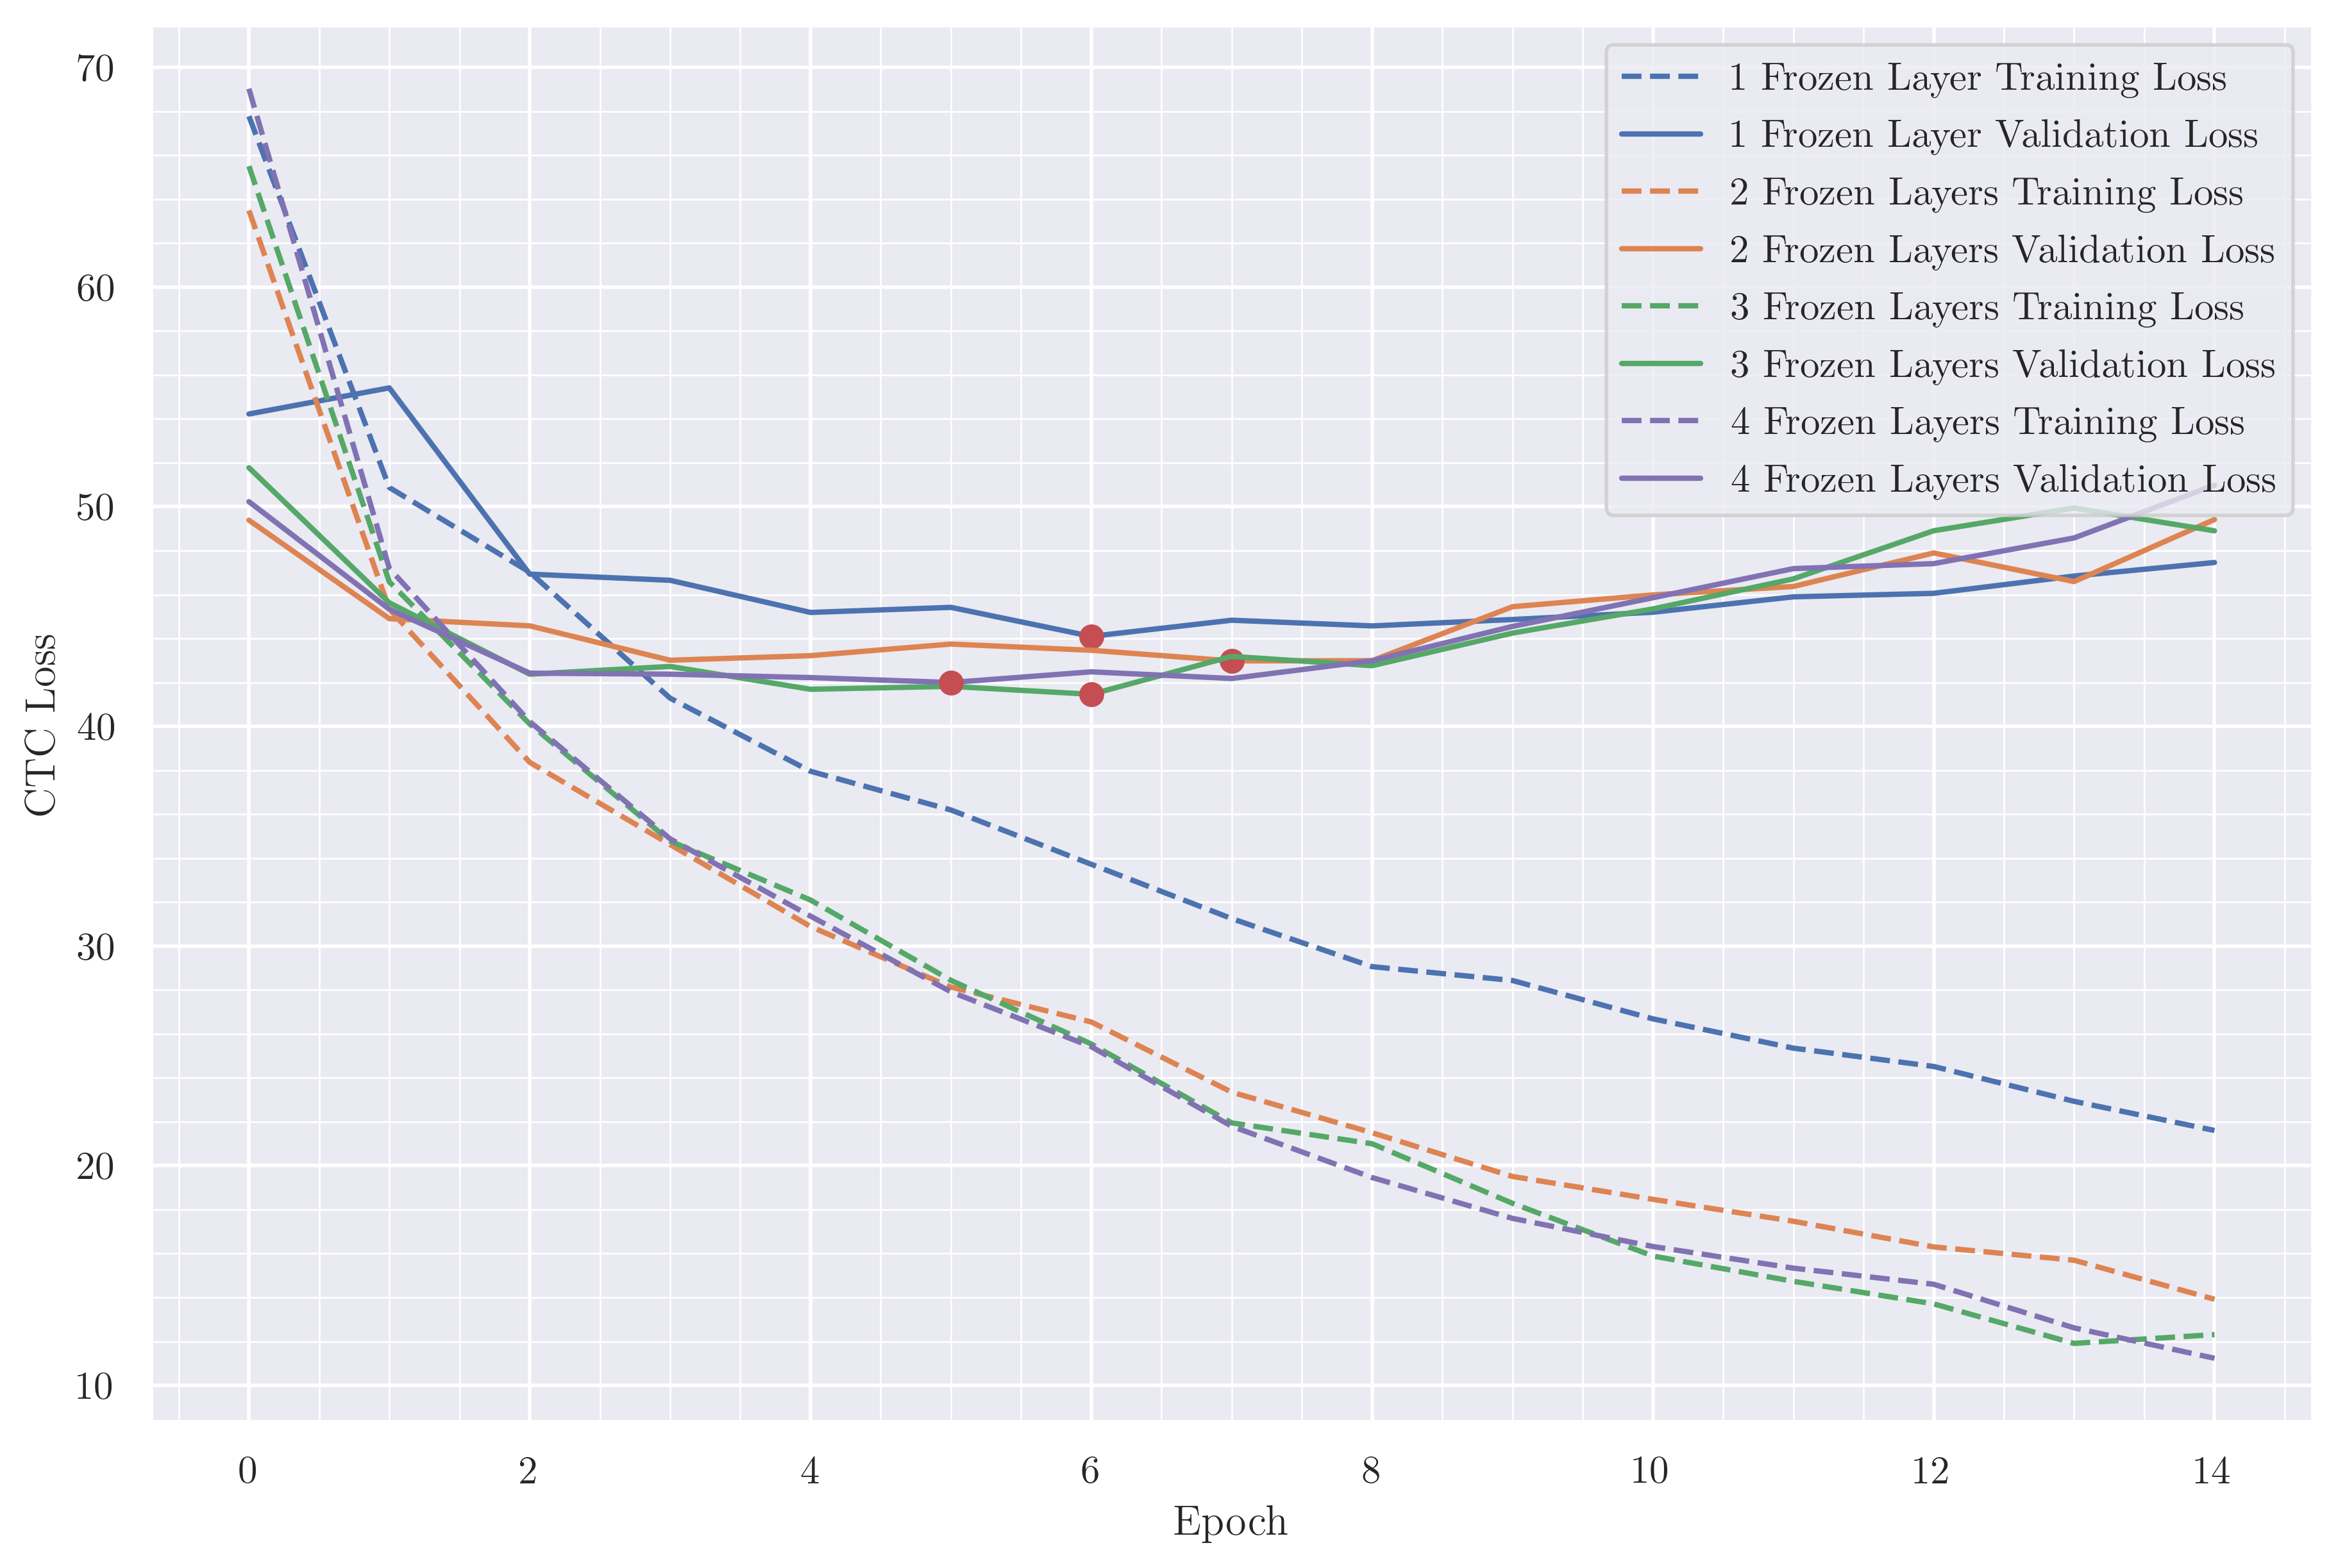

In [35]:
fig, ax = plt.subplots(constrained_layout=True)
ax.set_ylabel('CTC Loss')
ax.set_xlabel('Epoch')
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(True, 'minor', linewidth=0.5)

ax.plot(t_1layer.groupby('epoch').loss.last()[:15], 'C0--', label='1 Frozen Layer Training Loss')
ax.plot(v_1layer.groupby('epoch').loss.last()[:15], 'C0-', label='1 Frozen Layer Validation Loss')
ax.plot([b_1layer], [v_1layer.groupby('epoch').loss.last()[b_1layer]], 'ro')

ax.plot(t_2layer.groupby('epoch').loss.last()[:15], 'C1--', label='2 Frozen Layers Training Loss')
ax.plot(v_2layer.groupby('epoch').loss.last()[:15], 'C1-', label='2 Frozen Layers Validation Loss')
ax.plot([b_2layer], [v_2layer.groupby('epoch').loss.last()[b_2layer]], 'ro')

ax.plot(t_3layer.groupby('epoch').loss.last()[:15], 'C2--', label='3 Frozen Layers Training Loss')
ax.plot(v_3layer.groupby('epoch').loss.last()[:15], 'C2-', label='3 Frozen Layers Validation Loss')
ax.plot([b_3layer], [v_3layer.groupby('epoch').loss.last()[b_3layer]], 'ro')

ax.plot(t_4layer.groupby('epoch').loss.last()[:15], 'C4--', label='4 Frozen Layers Training Loss')
ax.plot(v_4layer.groupby('epoch').loss.last()[:15], 'C4-', label='4 Frozen Layers Validation Loss')
ax.plot([b_4layer], [v_4layer.groupby('epoch').loss.last()[b_4layer]], 'ro')

ax.legend(loc='upper right')

fig.savefig('4curves.pdf')
plt.show()

In [ ]:
# Results:
# - Complete Training: 
#   - WER: 0.697230, CER: 0.421320, loss: 68.087730
#   - 75 Epochs in 4:22:19.933501
# - Simple Transfer (No frozen layers):
#   - WER: 0.627491, CER: 0.372386, loss: 59.587582
#   - 30 Epochs in 1:02:04.997203
# - Finetuning (First 3 layers frozen):
#   - WER: 0.437464, CER: 0.224091, loss: 46.551868
#   - 30 Epochs in 1:02:09.698368